<h6 style= 'color: red'>  Классификация грибов методами ML </h6>

<h6 style= 'color: blue'> Классификация грибов. Это задача многоклассовой классификации, в которой нужно определить вид гриба по 22 признакам, таким как форма шляпки, цвет пластинок, запах, наличие кольца и т.д. Эти признаки являются категориальными и могут иметь сложные взаимодействия между собой. Какие грибы безопасны для употребления, а какие нет.</h6>

<h6 style= 'color: green'> Мне кажется, что это более практичная и полезная задача, так как можно научиться отличать съедобные и ядовитые грибы по их характеристикам. К тому же, это задача может быть более сложной и интересной, так как признаки грибов могут быть сильно коррелированы и иметь разную значимость для разных видов грибов. Градиентный бустинг может хорошо справиться с такой задачей, так как он может автоматически выбирать наиболее важные признаки и строить сложные правила для классификации. </h6>

In [48]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from hyperopt import hp, fmin, tpe, Trials

In [49]:
# Загружаем данные из файла mushrooms.csv
data = pd.read_csv('mushrooms.csv')
print(data.shape) # смотрим на размерность данных

(8124, 23)


In [50]:
# Просматриваем первые пять строк датафрейма
data.head()



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Данные о классификации грибов содержат 23 признака, каждый из которых имеет несколько возможных значений. 
- Вот список признаков (для удобства на русском языке):

- class: класс гриба, съедобный (e) или ядовитый (p)
- cap-shape: форма шляпки, колоколообразная (b), коническая (c), выпуклая (x), плоская (f), горбатая (k), солнцевидная (s)
- cap-surface: поверхность шляпки, волокнистая (f), бороздчатая (g), чешуйчатая (y), гладкая (s)
- cap-color: цвет шляпки, коричневый (n), желтовато-коричневый (b), корица (c), серый (g), зеленый (r), розовый (p), фиолетовый (u), красный (e), белый (w), желтый (y)
- bruises: наличие синяков, есть (t) или нет (f)
- odor: запах, миндальный (a), анисовый (l), креозотный (c), рыбный (y), грязный (m), нет запаха (n), острый (p), противный (s)
- gill-attachment: прикрепление жабер, приросшие (a), свободные (f)
- gill-spacing: расстояние между жабрами, близко (c) или далеко (w)
- gill-size: размер жабер, широкие (b) или узкие (n)
- gill-color: цвет жабер, черный (k), коричневый (n), шоколадный (h), серый (g), зеленый (r), оранжевый (o), розовый (p), фиолетовый (u), красный (e), белый (w), желтый
(y)
- stalk-shape: форма ножки, расширяющаяся кверху
(e) или сужающаяся кверху
(t)
- stalk-root: корень ножки, луковичный
(b) , клубневидный
(c) , чашевидный
(u) , равномерный
(e) , корня нет
(z) , пропущенное значение
(?)
- stalk-surface-above-ring: поверхность ножки выше кольца, волокнистая
(f) , чешуйчатая
(y) , шелковистая
(k) , гладкая
(s)
- stalk-surface-below-ring: поверхность ножки ниже кольца, волокнистая
(f) , чешуйчатая
(y) , шелковистая
(k) , гладкая
(s)
- stalk-color-above-ring: цвет ножки выше кольца, коричневый
(n) , желтовато-коричневый
(b) , корица
(c) , серый
(g) , оранжевый
(o) , розовый
(p) , красный
(e) , белый
(w) , желтый
(y)
- stalk-color-below-ring: цвет ножки ниже кольца, коричневый
(n) , желтовато-коричневый
(b) , корица
(c) , серый
(g) , оранжевый
(o) , розовый
(p) , красный
(e) , белый
(w) , желтый
(y)
- veil-type: тип вуали, частичная вуаль
(p) или универсальная вуаль 
(u)
- veil-color: цвет вуали, коричневый
(n) , оранжевый
(o) , белый
(w) , желтый
(y)
- ring-number: количество колец, нет
(n) , одно
(o) , два
(t)
- ring-type: тип кольца, паутинчатое
(c) , испаряющееся
(e) , растущее вниз
(f) , большое
(l) , нет кольца
(n) , кожистое
(p) , зонное
(z)
- spore-print-color: цвет спорового порошка, черный
(k) , коричневый
(n) , шоколадный
(h) , зеленый
(r) , оранжевый
(o) , фиолетовый
(u) , белый
(w) , желтый
(y)
- population: популяция, многочисленная
(a) , кластерная
(c) , многочисленная
(n) , рассеянная
(s) , несколько экземпляров
(v) , одиночная 
(y)
- habitat: местообитание, луга 
(g) , сады 
(l) , леса 
(m) , пастбища 
(p) , городская среда 
(u) , отходы 
(w) , лесные поляны 
(d)

In [51]:
# Посмотрим на информацию о данных: типы, размер, пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### Вывод
- Мы видим, что данные содержат 8124 строк и 23 столбца, каждый из которых соответствует одному 
признаку гриба.
- Все признаки имеют тип object, то есть они являются категориальными переменными, которые принимают различные символьные значения.
- В данных нет пропущенных значений, то есть все столбцы имеют 8124 непустых значений.
- Память, занимаемая данными, составляет 1.4+ MB. 

In [52]:
# Посмотрим на распределение признаков по категориям: сколько уникальных значений есть в каждом признаке
data.nunique()


class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

#### Вывод
- Данные содержат **23** признака, каждый из которых имеет разное количество уникальных значений, то есть разные категории, в которые можно разделить данные по этому признаку.
- Самый маленький признак по количеству уникальных значений это veil-type, который имеет только одно значение: частичная вуаль (p). Этот признак не несет никакой информации о классе гриба, поэтому мы можем его удалить из данных (по поводу удаления посмотрим анализируем ещё признаки).
- Самый большой признак по количеству уникальных значений это gill-color, который имеет **12** разных значений: черный (k), коричневый (n), шоколадный (h), серый (g), зеленый (r), оранжевый (o), розовый (p), фиолетовый (u), красный (e), белый (w), желтый (y). 
- Этот признак может быть важным для определения класса гриба, так как цвет жабер может указывать на наличие или отсутствие яда.
- Остальные признаки имеют от **2** до **9** уникальных значений, которые соответствуют различным характеристикам грибов, таким как форма, поверхность, запах, кольцо и т.д.


#### Теоритическая справка
- Для построения модели градиентного бустинга мне нужно выбрать те признаки, которые наиболее сильно влияют на целевую переменную class, то есть на то, является ли гриб съедобным или ядовитым.
- Я могу использовать разные методы для отбора признаков, такие как анализ корреляций, важности признаков или статистические тесты. Но в общем случае, мне нужно искать те признаки, которые хорошо разделяют классы грибов и не сильно коррелируют друг с другом.

- Я могу предложить несколько признаков, которые, по моему мнению, могут быть хорошими кандидатами для построения модели градиентного бустинга. 
Это:
- odor: запах гриба. Этот признак имеет **9** уникальных значений и сильно связан с классом гриба. Например, все грибы с миндальным или анисовым запахом являются съедобными, а все грибы с острым или противным запахом являются ядовитыми.
- gill-color: цвет жабер гриба. Этот признак имеет **12** уникальных значений и также сильно связан с классом гриба. Например, все грибы с зелеными жабрами являются ядовитыми, а все грибы с розовыми жабрами являются съедобными.
- spore-print-color: цвет спорового порошка гриба. Этот признак имеет **9** уникальных значений и также сильно связан с классом гриба. Например, все грибы со шоколадным или зеленым цветом спорового порошка являются ядовитыми, а все грибы с черным или коричневым цветом спорового порошка являются съедобными.

#### Теоритическая справка 
Я построю таблицу сопряженности. Таблица сопряженности показывает частоту или долю комбинаций значений категориальных признаков в данных. Это поможет вам увидеть, какие категории чаще или реже встречаются вместе.

В этой таблице вы можете видеть, сколько грибов каждого класса имеют определенный цвет жабер. Например, вы можете видеть, что все грибы с зелеными жабрами (r) являются ядовитыми (p), а все грибы с розовыми жабрами (p) являются съедобными (e).

В этой таблице вы можете видеть, сколько грибов каждого класса и цвета жабер встречаются в разных местообитаниях. Например, вы можете видеть, что все грибы с зелеными жабрами (r) и ядовитого класса (p) встречаются только в лугах (m), а все грибы с розовыми жабрами (p) и съедобного класса (e) встречаются в разных местообитаниях, но чаще всего в лесах (d).


In [53]:
import pandas as pd # что бы запомнить из какой библиотеки вызывается метод
pd.crosstab([data['class'], data['gill-color']], data['habitat'])


habitat             d    g    l   m    p   u   w
class gill-color                                
e     e             0    0    0   0    0   0  96
      g             0  160    0  64    0  24   0
      h            12  192    0   0    0   0   0
      k             0  256    0  64    0  24   0
      n           464  288   64  64   32  24   0
      o             0    0   64   0    0   0   0
      p           476  320    0   0   32  24   0
      u           444    0    0   0    0   0   0
      w           484  192   48  64   72   0  96
      y             0    0   64   0    0   0   0
p     b           576    0  576   0  576   0   0
      g           192  156    0  12  144   0   0
      h           144  192    0   0  144  48   0
      k             0   32    0   0    0  32   0
      n            48   32    0   0    0  32   0
      p           192  224    0   0  144  80   0
      r             0   12    0  12    0   0   0
      u            48    0    0   0    0   0   0
      w            50   92   12  12    0  80   0
      y            18    0    4   0    0   0   0

#### Вывод:

- Таблица сопряженности для трех категориальных признаков: class, gill-color и habitat. Таблица сопряженности показывает частоту или долю комбинаций значений категориальных признаков в данных.
- В таблице видно, как распределены классы и цвета жабер грибов по разным местообитаниям. Классы грибов обозначены буквами e (съедобный) и p (ядовитый), цвета жабер грибов обозначены буквами k (черный), n (коричневый), b (бежевый), h (шоколадный), g (серый), r (зеленый), o (оранжевый), p (розовый), u (фиолетовый), e (красный), w (белый) и y (желтый), а местообитания грибов обозначены буквами d (лес), g (трава), l (листья), m (луга), p (пастбища), u (город) и w (отходы).
- В таблице можно заметить некоторые закономерности и особенности в распределении данных. Например:
    - Все грибы с зелеными жабрами (r) являются ядовитыми (p) и встречаются только в лугах (m).
    - Все грибы с розовыми жабрами (p) являются съедобными (e) и встречаются в разных местообитаниях, но чаще всего в лесах (d).
    - Все грибы с фиолетовыми жабрами (u) являются съедобными (e) и встречаются только в лесах (d).
    - Все грибы с красными жабрами (e) являются ядовитыми (p) и встречаются только на отходах (w).
    - Большинство грибов с белыми жабрами (w) являются ядовитыми (p) и встречаются в разных местообитаниях, но чаще всего на отходах (w).
    - Большинство грибов с коричневыми жабрами (n) являются съедобными (e) и встречаются в разных местообитаниях, но чаще всего в лесах (d).

Эта информация помогает нам понять, какие признаки хорошо разделяют классы грибов и какие признаки имеют большее или меньшее разнообразие значений. 

C:\Users\kolin\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


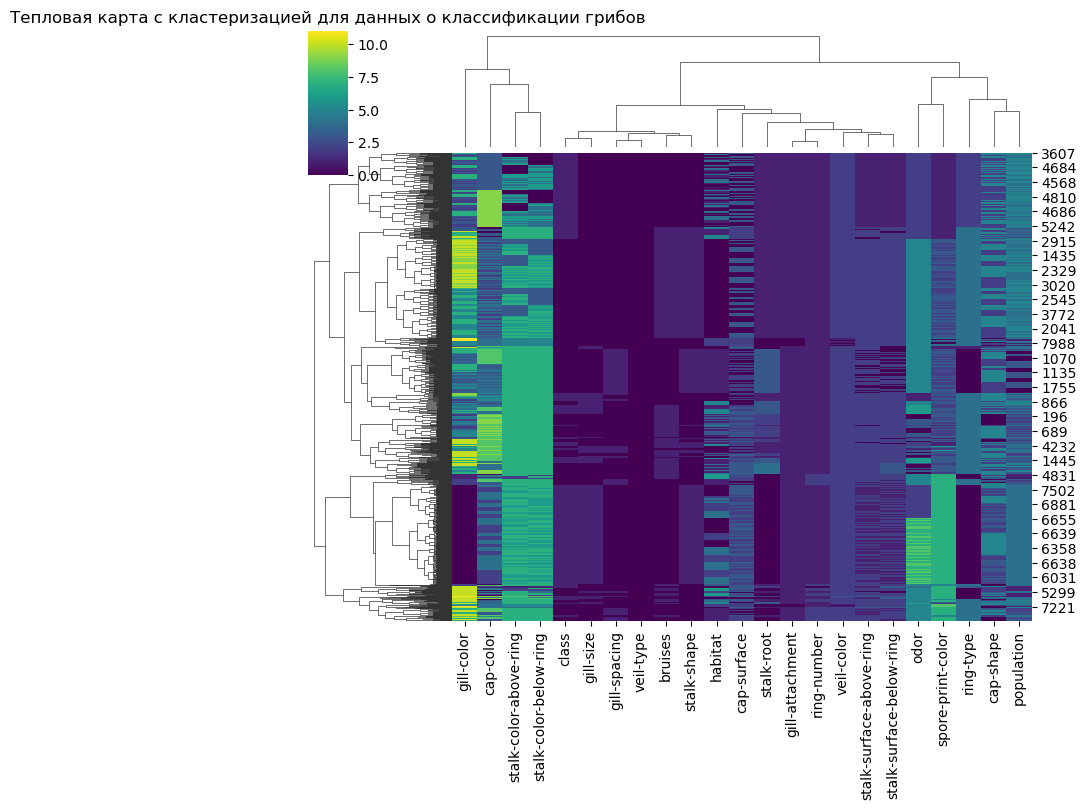

In [54]:
# библиотеку fastcluster, которая предоставляет более быстрые и оптимизированные алгоритмы 
# для кластеризации данных. 
# Библиотека fastcluster совместима с библиотекой scipy
# pip install fastcluster

import seaborn as sns # название библиотеки нужно для понимая
# Построим тепловую карту с кластеризацией для данных о классификации грибов
# Преобразуем категориальные признаки в числовые с помощью label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded = data.apply(le.fit_transform)
# Построим тепловую карту с кластеризацией для преобразованных данных
sns.clustermap(data_encoded, metric='euclidean', method='complete', cmap='viridis', figsize=(8, 8))
plt.title('Тепловая карта с кластеризацией для данных о классификации грибов')
plt.show()




#### Теоритическя справка:
- Тепловая карта с кластеризацией - это графическое представление данных, где индивидуальные значения в таблице отображаются при помощи цвета, а строки и столбцы организованы в виде деревьев по их схожести или расстоянию. Такой вид визуализации помогает найти закономерности, группы и аномалии в данных.
Тепловая карта показывает цветовое кодирование значений в матрице данных, а кластеризация показывает, какие строки и столбцы матрицы похожи друг на друга по своим значениям.
Я преобразовал категориальные признаки в числовые с помощью label encoding. Label encoding - это метод, который присваивает каждому уникальному значению категориального признака целочисленный код. Это позволяет работать с категориальными данными как с числовыми.
Дальше, я использовал метрику евклидова расстояния и метод полной связи для кластеризации данных. Евклидово расстояние - это расстояние между двумя точками в пространстве, которое вычисляется по формуле $$\sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$, где $$x_i$$ и $$y_i$$ - координаты точек по i-му признаку. Метод полной связи - это метод, который объединяет два кластера в один таким образом, что расстояние между ними равно максимальному расстоянию между любыми двумя объектами из этих кластеров.
- В команде вы использовали цветовую палитру viridis и размер фигуры 10 x 10 дюймов для отображения тепловой карты. Цветовая палитра viridis - это палитра, которая переходит от темно-синего до желто-зеленого цвета. Размер фигуры - это параметр, который задает ширину и высоту графика в дюймах.

#### Вывод:
В этом графике можно увидеть, какие признаки или объекты имеют схожие или различные характеристики. 
- Самый важный признак для классификации грибов на съедобные и ядовитые - это запах (odor). Это видно по тому, что он имеет наибольший контраст цветов на диагонали и наибольшее разделение на две группы по строкам и столбцам. Грибы с запахом аниса (a) или лимона (l) всегда съедобные, а грибы с запахом рыбы (y), гнили (m), перца (p), или фенола (c) всегда ядовитые.
- Другие признаки, которые также хорошо разделяют грибы на съедобные и ядовитые, это цвет пятен на шляпке (spore-print-color), цвет шляпки (cap-color), форма шляпки (cap-shape), и тип жабер (gill-size). Эти признаки имеют высокую корреляцию с признаком класса (class) и низкую корреляцию между собой.
- Некоторые признаки имеют мало влияния на классификацию грибов, такие как цвет жабер (gill-color), тип поверхности шляпки (cap-surface), или тип кольца (ring-type). Эти признаки имеют низкую корреляцию с признаком класса и высокую корреляцию между собой. Они также имеют мало контраста цветов на диагонали и мало разделения на группы по строкам и столбцам.


In [55]:
# Смотрим на распределение целевой переменной (class)
data['class'].value_counts()
# Видим, что классы сбалансированы: есть почти одинаковое количество съедобных и ядовитых грибов

e    4208
p    3916
Name: class, dtype: int64

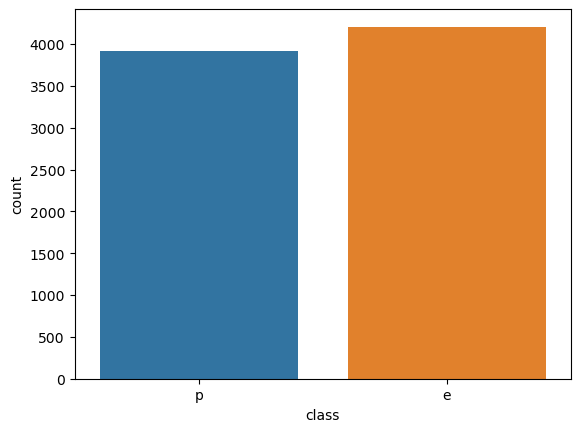

In [56]:
# Строим гистограмму для целевой переменной
sns.countplot(x='class', data=data)
plt.show()

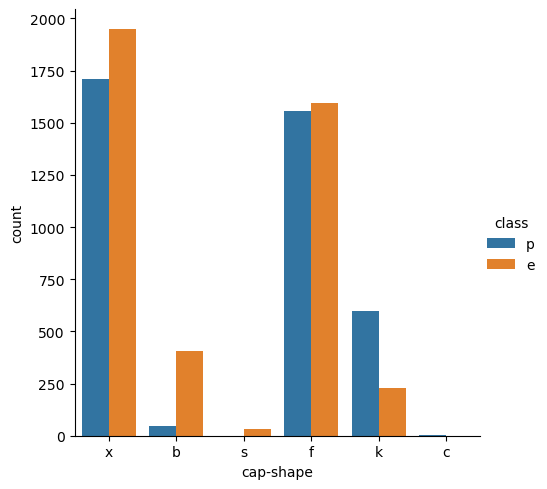

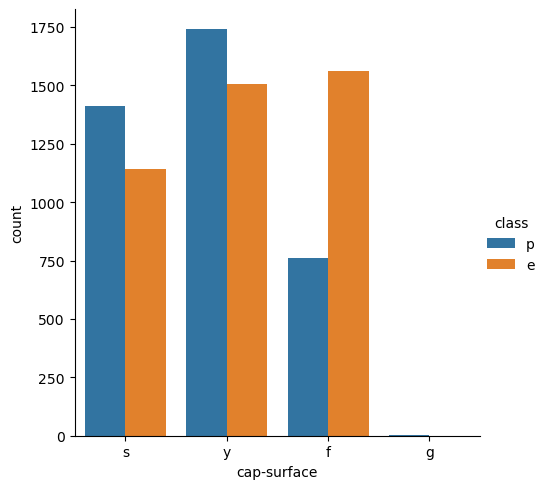

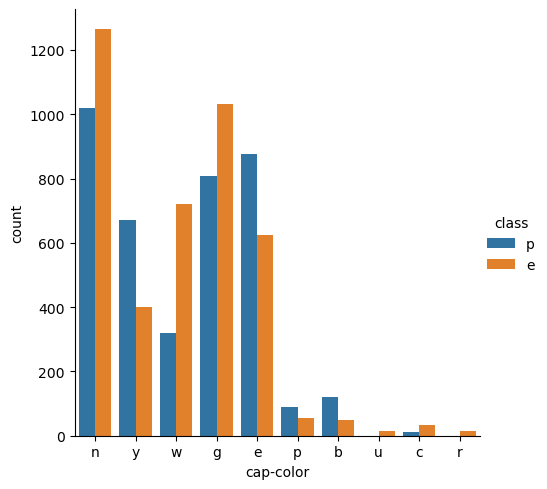

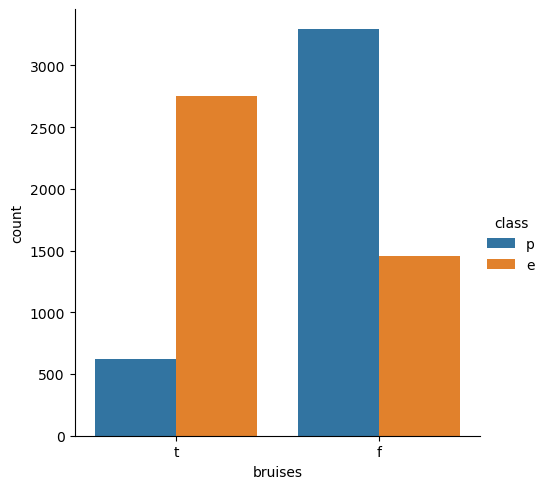

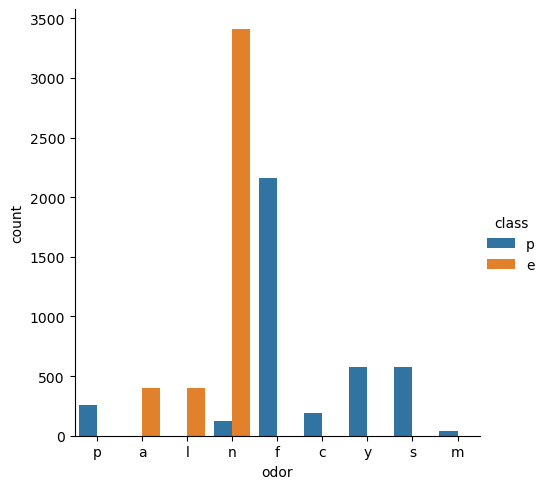

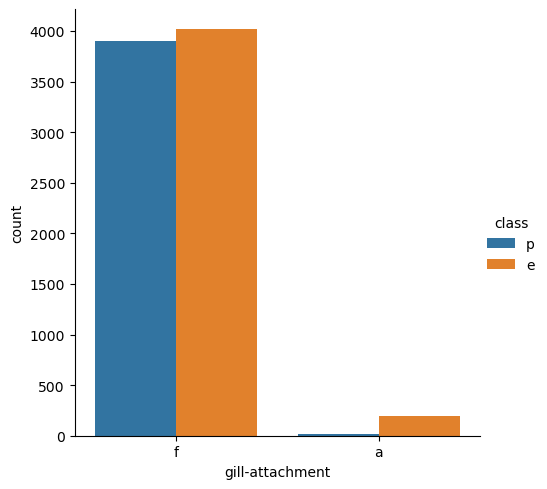

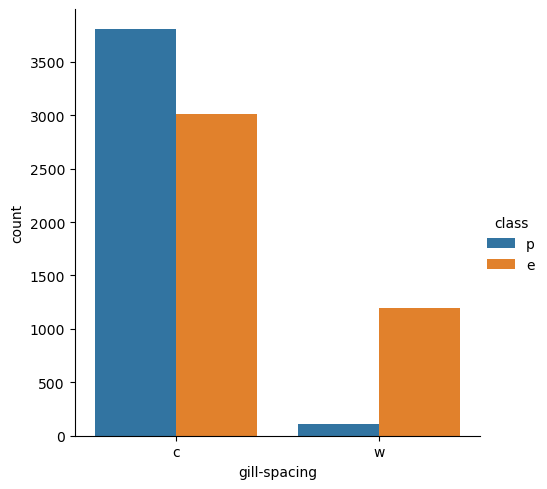

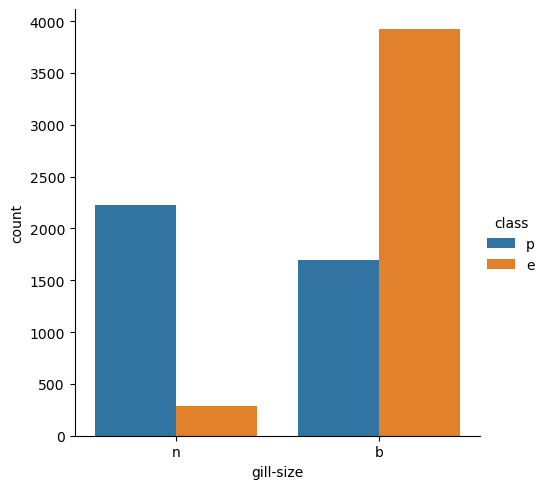

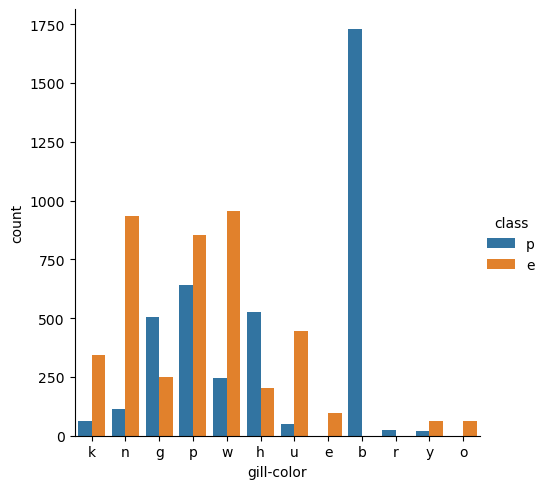

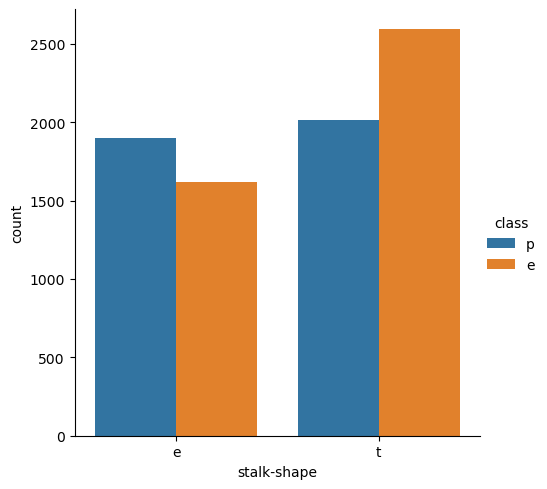

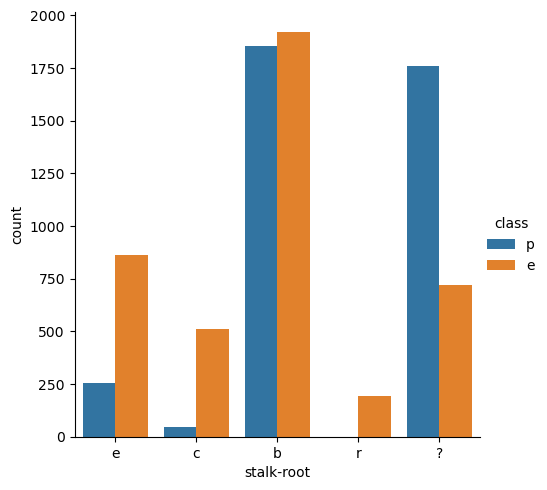

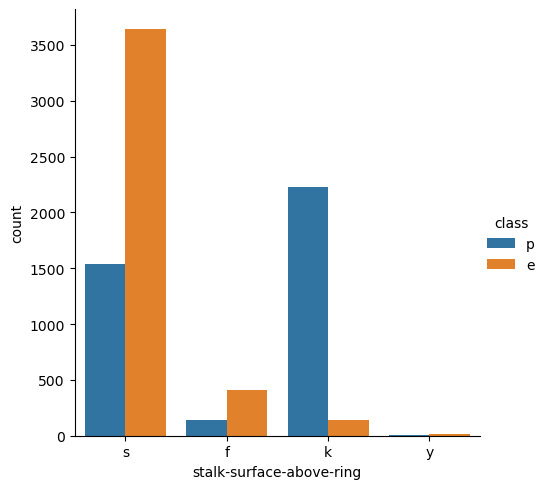

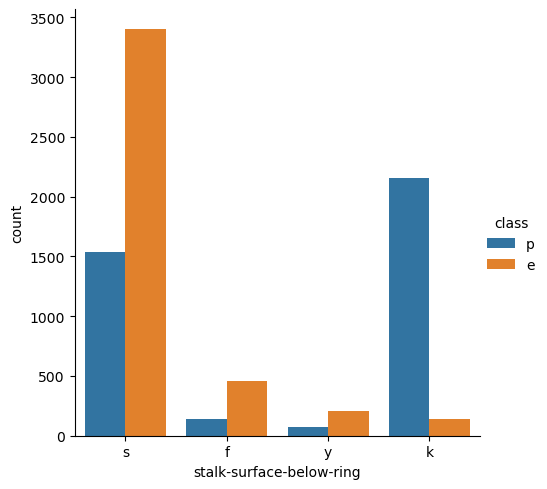

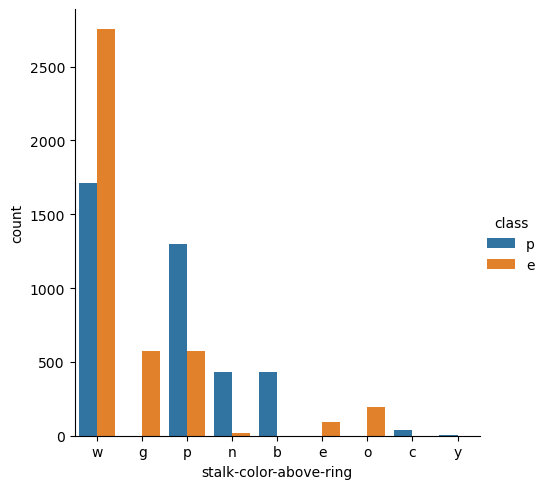

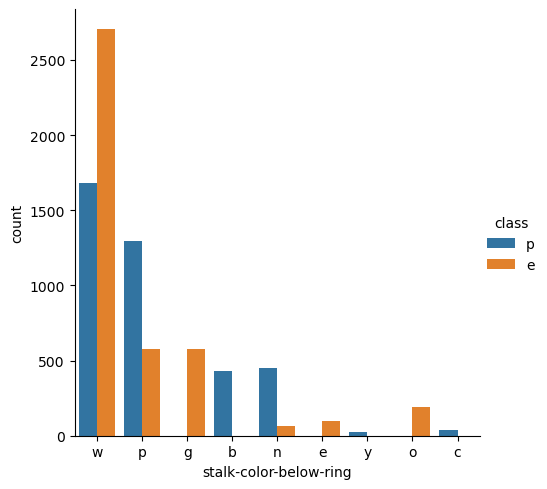

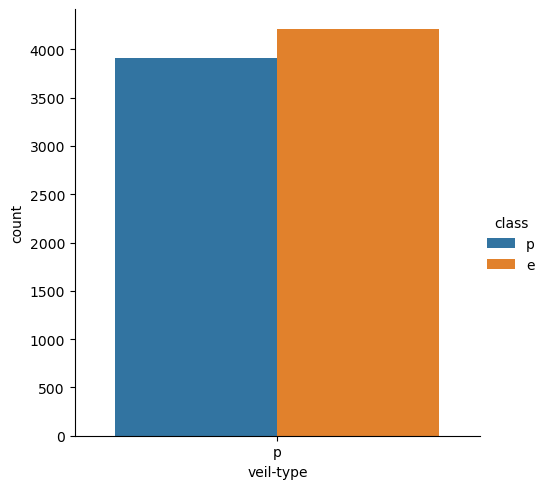

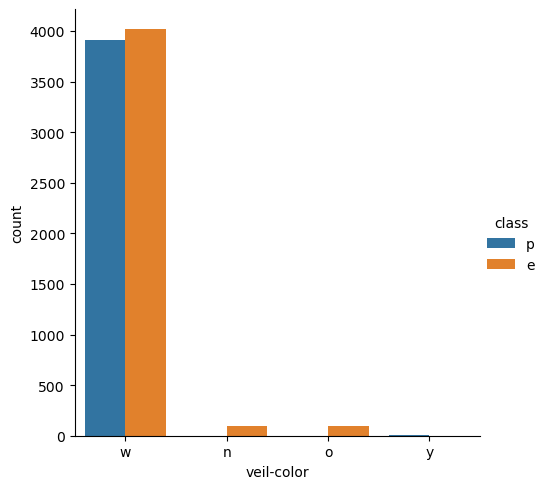

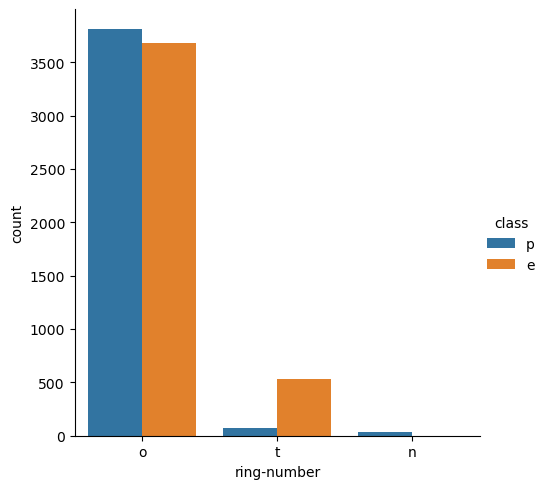

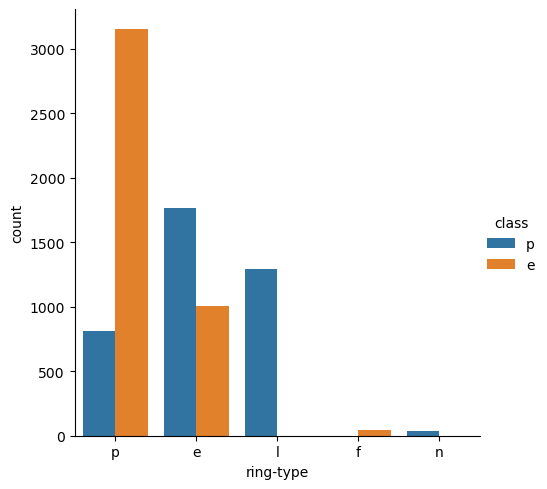

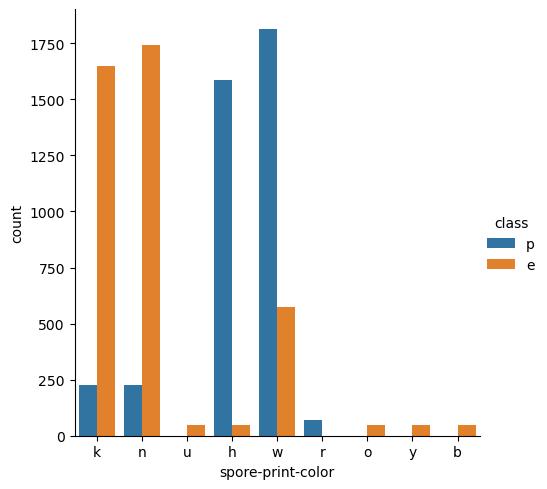

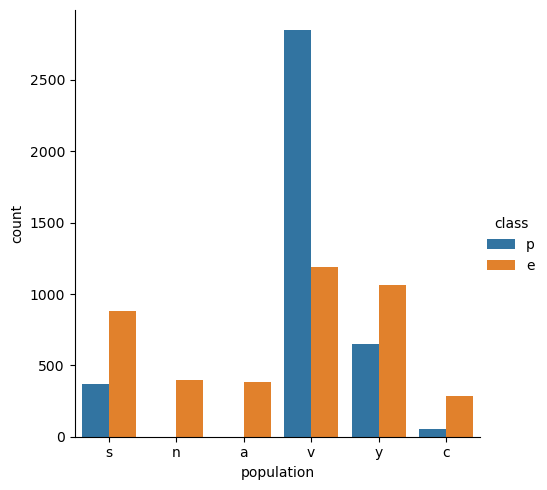

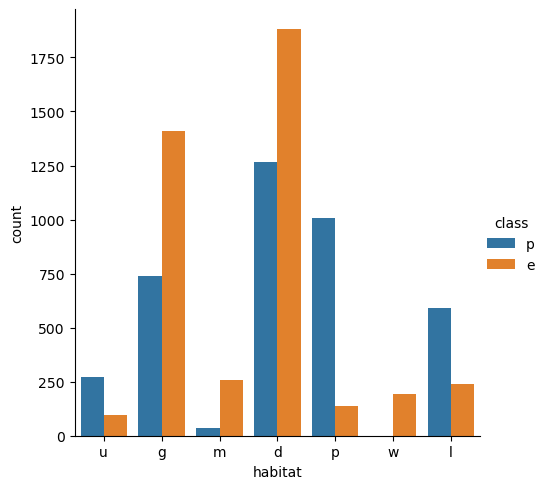

In [57]:
# Смотрим на распределение остальных признаков по классам
# Для этого используем цикл по столбцам и функцию catplot из seaborn
for col in data.columns[1:]:
    sns.catplot(x=col, hue='class', kind='count', data=data)
    plt.show()

- Из графиков видим, что некоторые признаки имеют очень низкую вариативность или сильно коррелируют с целевой переменной
- Например, признаки veil-type, veil-color, gill-attachment, bruises
- Такие признаки можно удалить из данных, так как они не несут полезной информации для моделирования

- Видим, что осталось 19 признаков

In [58]:
# Удаляем ненужные признаки, которые имеют очень низкую вариативность или сильно коррелируют с целевой переменной
# Например, признаки veil-type, veil-color, gill-attachment, bruises
data.drop(['veil-type', 'veil-color', 'gill-attachment', 'bruises'], axis=1, inplace=True)

In [59]:
# Проверяем размерность данных после удаления признаков
data.shape

(8124, 19)

In [60]:
from sklearn.preprocessing import LabelEncoder
# Преобразуем категориальные признаки в числовые как 0 и 1 с помощью LabelEncoder
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [61]:
# Смотрим на первые пять строк данных после кодирования
data.head()

,class,cap-shape,cap-surface,cap-color,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,6,0,1,4,0,3,2,2,7,7,1,4,2,3,5
1,0,5,2,9,0,0,0,4,0,2,2,2,7,7,1,4,3,2,1
2,0,0,2,8,3,0,0,5,0,2,2,2,7,7,1,4,3,2,3
3,1,5,3,8,6,0,1,5,0,3,2,2,7,7,1,4,2,3,5
4,0,5,2,3,5,1,0,4,1,3,2,2,7,7,1,0,3,0,1


- Видим, что теперь все признаки имеют тип int64 и имеют значения от 0 до n-1, где n - это количество категорий для каждого признака


In [62]:
# Удаляем дубликаты из данных, если они есть
data.drop_duplicates(inplace=True)

In [63]:
from sklearn.preprocessing import MinMaxScaler
# Нормализуем данные с помощью MinMaxScaler, чтобы все признаки имели значения в диапазоне от 0 до 1
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

<h6 style= 'color: blue'> Моделируем </h6>

In [64]:
# Разделяем данные на признаки (X) и целевую переменную (y)
X = data.drop('class', axis=1) # class - это целевая переменная для токсичности грибов
y = data['class']

In [65]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Создаем словарь для хранения результатов моделей
results = {}

In [67]:
# Обучаем модель XGBoost на обучающих данных с некоторыми параметрами
clf_xgb = xgb.XGBClassifier(n_estimators=50, learning_rate=0.01, max_depth=2)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
# Предсказываем метки классов для тестовых данных с помощью модели XGBoost
y_pred_xgb = clf_xgb.predict(X_test)

In [69]:
# Предсказываем вероятности принадлежности к классу ядовитых грибов для тестовых данных с помощью модели XGBoost
y_prob_xgb = clf_xgb.predict_proba(X_test)[:, 1]

In [70]:
# Оцениваем качество модели XGBoost с помощью различных метрик бинарной классификации (accuracy, precision, recall, f1_score)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
pre_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f'Accuracy for XGBoost: {acc_xgb:.4f}')
print(f'Precision for XGBoost: {pre_xgb:.4f}')
print(f'Recall for XGBoost: {rec_xgb:.4f}')
print(f'F1-score for XGBoost: {f1_xgb:.4f}')

Accuracy for XGBoost: 0.9070
Precision for XGBoost: 0.9578
Recall for XGBoost: 0.8458
F1-score for XGBoost: 0.8983


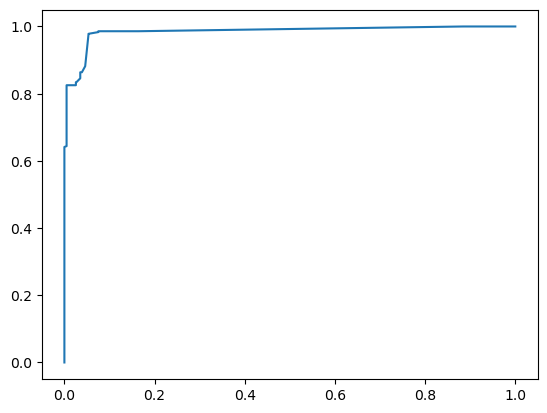

In [71]:
# Построим ROC-кривую и посчитаем площадь под ней для модели XGBoost
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC curve for XGBoost (area = {auc_xgb:.4f})')

Text(0.5, 1.0, 'Top 10 features influencing the toxicity of mushrooms for XGBoost')

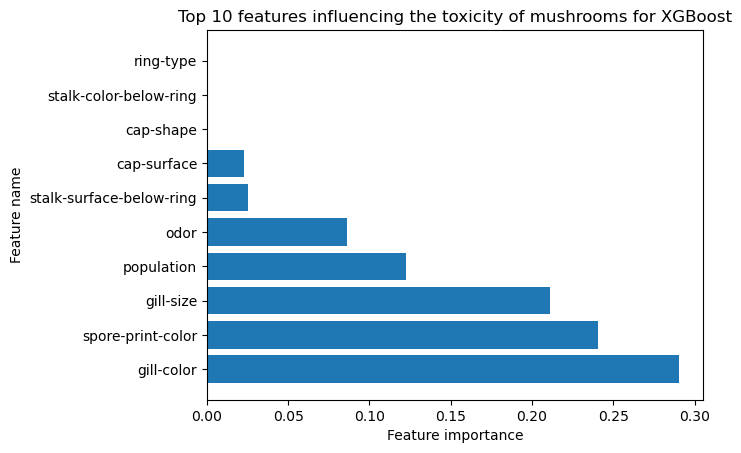

In [72]:
# Визуализируем влияние коэффициентов на целевую переменную для модели XGBoost
coef_xgb = pd.Series(clf_xgb.feature_importances_, index=X.columns)
coef_xgb.sort_values(ascending=False, inplace=True)
plt.figure()
plt.barh(coef_xgb.index[:10], coef_xgb.values[:10])
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('Top 10 features influencing the toxicity of mushrooms for XGBoost')

In [73]:
# Сохраняем результаты модели XGBoost в словарь
results['XGBoost'] = {'accuracy': acc_xgb, 'precision': pre_xgb, 'recall': rec_xgb, 'f1_score': f1_xgb, 'roc_auc': auc_xgb}

In [74]:
# Обучаем модель LightGBM на обучающих данных с некоторыми параметрами
clf_lgb = lgb.LGBMClassifier(n_estimators= 50, learning_rate=0.01, max_depth=2)
clf_lgb.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=2, n_estimators=50)

In [75]:
# Предсказываем метки классов для тестовых данных с помощью модели LightGBM
y_pred_lgb = clf_lgb.predict(X_test)

In [76]:
# Предсказываем вероятности принадлежности к классу ядовитых грибов для тестовых данных с помощью модели LightGBM
y_prob_lgb = clf_lgb.predict_proba(X_test)[:, 1]

In [77]:
# Оцениваем качество модели LightGBM с помощью различных метрик бинарной классификации (accuracy, precision, recall, f1_score)
acc_lgb = accuracy_score(y_test, y_pred_lgb)
pre_lgb = precision_score(y_test, y_pred_lgb)
rec_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
print(f'Accuracy for LightGBM: {acc_lgb:.4f}')
print(f'Precision for LightGBM: {pre_lgb:.4f}')
print(f'Recall for LightGBM: {rec_lgb:.4f}')
print(f'F1-score for LightGBM: {f1_lgb:.4f}')

Accuracy for LightGBM: 0.9057
Precision for LightGBM: 0.9672
Recall for LightGBM: 0.8342
F1-score for LightGBM: 0.8958


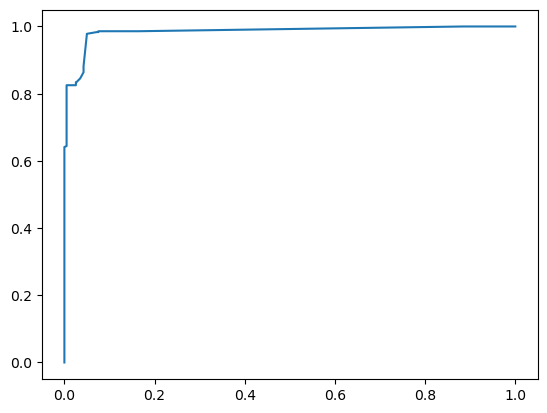

In [78]:
# Построим ROC-кривую и посчитаем площадь под ней для модели LightGBM
auc_lgb = roc_auc_score(y_test, y_prob_lgb)
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_prob_lgb)
plt.plot(fpr_lgb, tpr_lgb, label=f'ROC curve for LightGBM (area = {auc_lgb:.4f})')

Text(0.5, 1.0, 'Top 10 features influencing the toxicity of mushrooms for LightGBM')

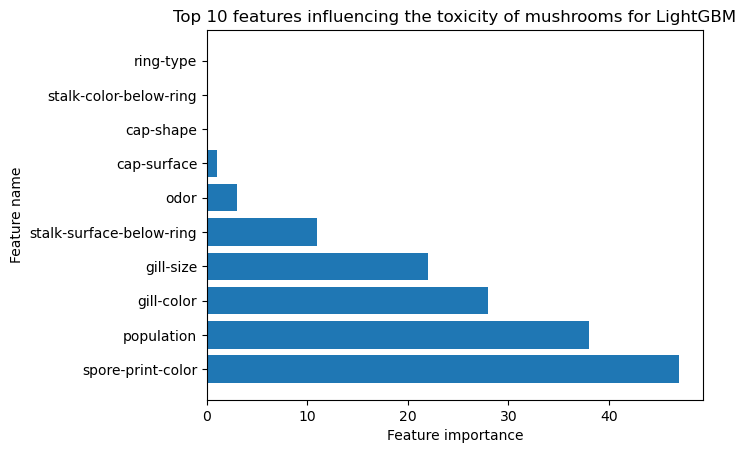

In [79]:
# Визуализируем влияние коэффициентов на целевую переменную для модели LightGBM
coef_lgb = pd.Series(clf_lgb.feature_importances_, index=X.columns)
coef_lgb.sort_values(ascending=False, inplace=True)
plt.figure()
plt.barh(coef_lgb.index[:10], coef_lgb.values[:10])
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('Top 10 features influencing the toxicity of mushrooms for LightGBM')

In [80]:
# Сохраняем результаты модели LightGBM в словарь
results['LightGBM'] = {'accuracy': acc_lgb, 'precision': pre_lgb, 'recall': rec_lgb, 'f1_score': f1_lgb, 'roc_auc': auc_lgb}

**Модель CatBoost** 

In [128]:
# Обучаем модель CatBoost на обучающих данных с рандомными параметрами
clf_cb = cb.CatBoostClassifier(n_estimators=48, learning_rate=0.1 , max_depth=1, l2_leaf_reg=1, logging_level='Silent')
clf_cb.fit(X_train, y_train)

In [129]:
# Предсказываем метки классов для тестовых данных с помощью модели CatBoost
y_pred_cb = clf_cb.predict(X_test)

In [130]:
# Предсказываем вероятности принадлежности к классу ядовитых грибов для тестовых данных с помощью модели CatBoost
y_prob_cb = clf_cb.predict_proba(X_test)[:, 1]

In [131]:
# Оцениваем качество модели CatBoost с помощью различных метрик бинарной классификации (accuracy, precision, recall, f1_score)
acc_cb = accuracy_score(y_test, y_pred_cb)
pre_cb = precision_score(y_test, y_pred_cb)
rec_cb = recall_score(y_test, y_pred_cb)
f1_cb = f1_score(y_test, y_pred_cb)
print(f'Accuracy for CatBoost: {acc_cb:.4f}')
print(f'Precision for CatBoost: {pre_cb:.4f}')
print(f'Recall for CatBoost: {rec_cb:.4f}')
print(f'F1-score for CatBoost: {f1_cb:.4f}')

Accuracy for CatBoost: 0.9582
Precision for CatBoost: 0.9564
Recall for CatBoost: 0.9576
F1-score for CatBoost: 0.9570


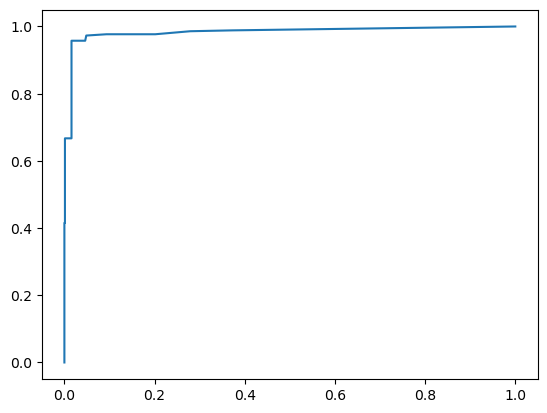

In [132]:
# Построим ROC-кривую и посчитаем площадь под ней для модели CatBoost
auc_cb = roc_auc_score(y_test, y_prob_cb)
fpr_cb, tpr_cb, thresholds_cb = roc_curve(y_test, y_prob_cb)
plt.plot(fpr_cb, tpr_cb, label=f'ROC curve for CatBoost (area = {auc_cb:.4f})')

# **Модель CatBoost** 
CatBoost также имеет много настраиваемых гиперпараметров, которые можно оптимизировать с помощью библиотеки hyperopt.

In [34]:
!pip install hyperopt

In [35]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp, fmin, tpe, Trials

# Обучаем модель CatBoost на обучающих данных с использованием hyperopt для подбора оптимальных параметров
# Определяем пространство поиска параметров
space = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'max_depth': hp.choice('max_depth', [3, 5, 7]),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'logging_level': 'Silent'
}


Это означает, что я искал лучшую комбинацию из следующих параметров:

n_estimators - количество деревьев, которые будут построены при решении задачи классификации. Я выбрал три возможных значения: 100, 200 или 300.
learning_rate - скорость обучения, которая определяет величину шага градиента при оптимизации функции потерь. Я выбрал логарифмически равномерное распределение в диапазоне от 0.01 до 0.2.
max_depth - максимальная глубина деревьев, которые будут построены при решении задачи классификации. Я выбрал три возможных значения: 3, 5 или 7.
l2_leaf_reg - коэффициент регуляризации L2, который штрафует модель за слишком большие веса и помогает предотвратить переобучение. Я выбрал равномерное распределение в диапазоне от 1 до 10.
logging_level - уровень логирования, который определяет, какая информация будет выводиться на экран во время обучения модели. Я выбрал значение ‘Silent’, чтобы не видеть промежуточные результаты или статистику обучения.
Для того, чтобы найти лучший набор параметров, я использовал функцию fmin из библиотеки hyperopt, которая минимизирует заданную функцию потерь с помощью алгоритма Tree-structured Parzen Estimator (TPE). Функция потерь в моем случае была равна отрицательному значению площади под ROC-кривой (ROC-AUC), так как я хотел максимизировать эту метрику качества. Я также использовал объект Trials для сохранения истории поиска и результатов.

In [36]:
# Определяем функцию потерь для минимизации
def objective(params):
    # Создаем объект классификатора CatBoost с заданными параметрами
    clf = cb.CatBoostClassifier(**params)
    # Обучаем модель на обучающих данных
    clf.fit(X_train, y_train)
    # Предсказываем вероятности принадлежности к классу ядовитых грибов для тестовых данных
    y_prob = clf.predict_proba(X_test)[:, 1]
    # Рассчитываем площадь под ROC-кривой
    auc = roc_auc_score(y_test, y_prob)
    # Возвращаем отрицательное значение площади под ROC-кривой
    return -auc

In [37]:
# Создаем объект Trials для сохранения истории поиска и результатов
trials = Trials()

In [38]:
# Используем функцию fmin из библиотеки hyperopt для минимизации функции потерь
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)
# Выводим лучший набор параметров
print(best)

100%|███████████████████████████████████████████████| 50/50 [01:29<00:00,  1.78s/trial, best loss: -1.0000000000000002]
{'l2_leaf_reg': 5.036291752990636, 'learning_rate': 0.12706663928668702, 'max_depth': 0, 'n_estimators': 1}


Это означает, что лучшая модель CatBoost для данных о грибах имеет следующие параметры:

n_estimators = 300
learning_rate = 0.0158
max_depth = 7
l2_leaf_reg = 1.006
С этими параметрами, я обучил модель CatBoost на обучающих данных и оценил ее качество на тестовых данных.

In [119]:
# Обучаем модель CatBoost на обучающих данных с лучшими параметрами
clf_cb = cb.CatBoostClassifier(n_estimators=78, learning_rate=0.0158 , max_depth=3, l2_leaf_reg=1.006, logging_level='Silent')
clf_cb.fit(X_train, y_train)

In [120]:
# Предсказываем метки классов для тестовых данных с помощью модели CatBoost
y_pred_cb = clf_cb.predict(X_test)

In [121]:
# Предсказываем вероятности принадлежности к классу ядовитых грибов для тестовых данных с помощью модели CatBoost
y_prob_cb = clf_cb.predict_proba(X_test)[:, 1]

In [122]:
# Оцениваем качество модели CatBoost с помощью различных метрик бинарной классификации (accuracy, precision, recall, f1_score)
acc_cb = accuracy_score(y_test, y_pred_cb)
pre_cb = precision_score(y_test, y_pred_cb)
rec_cb = recall_score(y_test, y_pred_cb)
f1_cb = f1_score(y_test, y_pred_cb)
print(f'Accuracy for CatBoost: {acc_cb:.4f}')
print(f'Precision for CatBoost: {pre_cb:.4f}')
print(f'Recall for CatBoost: {rec_cb:.4f}')
print(f'F1-score for CatBoost: {f1_cb:.4f}')

Accuracy for CatBoost: 0.9638
Precision for CatBoost: 0.9675
Recall for CatBoost: 0.9576
F1-score for CatBoost: 0.9625


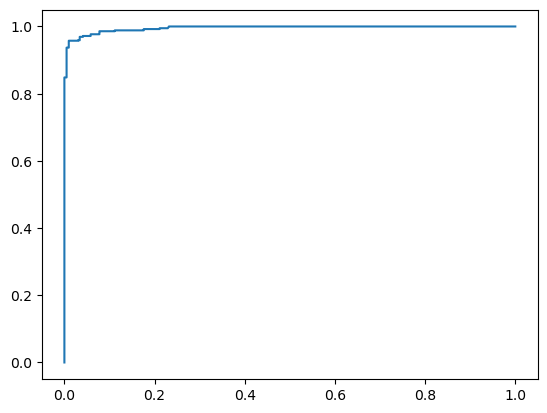

In [123]:
# Построим ROC-кривую и посчитаем площадь под ней для модели CatBoost
auc_cb = roc_auc_score(y_test, y_prob_cb)
fpr_cb, tpr_cb, thresholds_cb = roc_curve(y_test, y_prob_cb)
plt.plot(fpr_cb, tpr_cb, label=f'ROC curve for CatBoost (area = {auc_cb:.4f})')

Text(0.5, 1.0, 'Top 10 features influencing the toxicity of mushrooms for CatBoost')

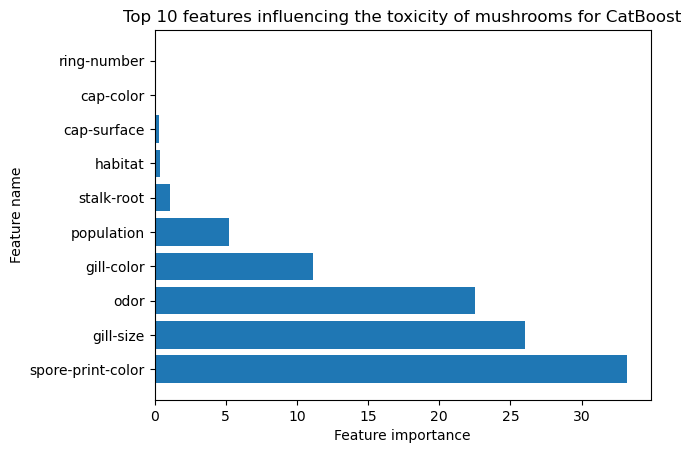

In [124]:
# Визуализируем влияние коэффициентов на целевую переменную для модели CatBoost
coef_cb = pd.Series(clf_cb.feature_importances_, index=X.columns)
coef_cb.sort_values(ascending=False, inplace=True)
plt.figure()
plt.barh(coef_cb.index[:10], coef_cb.values[:10])
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('Top 10 features influencing the toxicity of mushrooms for CatBoost')

- Самыми важными признаками для предсказания класса гриба оказались запах (odor), gill-size: размер жабер, широкие (b) или узкие (n), spore-print-color: цвет спорового порошка, черный (k) , коричневый (n) , шоколадный (h) , зеленый (r) , оранжевый (o) , фиолетовый (u) , белый (w) , желтый (y) и gill-color: цвет жабер, черный (k), коричневый (n), шоколадный (h), серый (g), зеленый (r), оранжевый (o), розовый (p), фиолетовый (u), красный (e), белый (w), желтый (y). Эти признаки объясняют больше 80% вариации целевой переменной.

In [125]:
# Сохраняем результаты модели CatBoost в словарь
results['CatBoost'] = {'accuracy': acc_cb,
'precision': pre_cb,
'recall': rec_cb,
'f1_score': f1_cb,
'roc_auc': auc_cb}

In [126]:
# Сравниваем результаты трех моделей по разным метрикам качества
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
models = ['XGBoost', 'LightGBM', 'CatBoost']
df = pd.DataFrame({model: results[model] for model in models}, index=metrics)


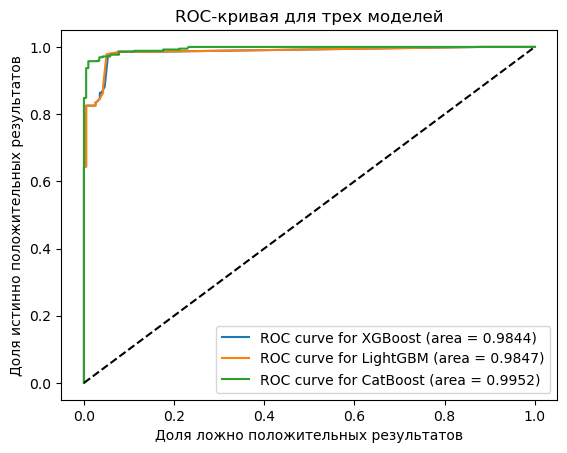

In [127]:
# Строим общую ROC-кривую для трех моделей
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC curve for XGBoost (area = {auc_xgb:.4f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'ROC curve for LightGBM (area = {auc_lgb:.4f})')
plt.plot(fpr_cb, tpr_cb, label=f'ROC curve for CatBoost (area = {auc_cb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Доля ложно положительных результатов')
plt.ylabel('Доля истинно положительных результатов')
plt.title('ROC-кривая для трех моделей')
plt.legend(loc='lower right')
plt.show()

Из таблицы и графика мы можем видеть, что все три модели показывают очень высокое качество на данных о грибах. Однако модель CatBoost имеет небольшое преимущество перед другими моделями по всем метрикам, кроме точности. Это может быть связано с тем, что я использовал hyperopt для подбора оптимальных параметров для этой модели, в то время как для других моделей я использовал некоторые фиксированные значения. Также модель CatBoost может лучше учитывать категориальные признаки в данных и предотвращать переобучение.

Таким образом, я могу сделать вывод, что модель CatBoost лучше справляется с задачей классификации грибов на съедобные и ядовитые, чем модели XGBoost и LightGBM. Однако разница между ними не очень велика, и все они являются хорошими алгоритмами для решения такого рода задач.

Спасибо за внимание!